# Etude du marché: Entreprise française d'Agro-Alimentaire (1ère partie)

**Contexte du projet:**

L'international, oui, mais pour l'instant, le champ des possibles est bien large : aucun pays particulier ni aucun continent n'est pour le moment choisi. Tous les pays sont envisageables !

**Objectif:** 

Proposer une première analyse des groupements de pays que l’on peut cibler pour exporter nos poulets. Approfondir ensuite l'étude du marché, à partir des données de la FAO.

**Mission:**

D'abord tester la **classification ascendante hierarchique** avec un **dendrogramme** comme visualisation. Utiliser ensuite la **méthode K-means** pour affiner l'analyse et comparer les deux méthodes de clustering. Enfin réaliser une **ACP** afin de visualliser les résultats d'analyse, comprendre les groupes, les liens entre les variables, les liens entre les individus.... 

**L'élaboration de ce travail se fait de la manière suivante:**

Dans la première partie, on fait le nettoyage et la preparation des données. Ces données sont chargées à ppartir du site de la FAO(https://www.fao.org/faostat/fr/#data/). Pour les pays disponibles, les variables étudiées sont:

- l'évolution de la population de  2017-2018
- la disponibilité almentaire en Kcal par personne
- la disponibilitaire de Protéine en g par personne
- la disponibilité de protéines animales en g par personne
- le PIB par habitant 
- la quantité de poulets produits 
- la valeur des poulets importés

On fait une visualisation avec un **Heatmap** pour voir les différentes correlations ou liaisons qui existent entre les variables à étudier.

Dans la seconde partie:

d'abord on fait une partition des individus(pays). Le clustering sert à regrouper des individus qui ont des similarités. Les deux méthodes de clustering utilisées sont: 
- la classification ascendante hierarchique avec un dendrogramme qui permet de visualiser les différents groupes.
- le clustering K-means qui permet de fixer le nombre K de clusters 

ensuite,on étudie **la variabilité (qui ont des similarités) et les liaisons entre les pays**:
- idendifier la liste des pays qui constituent chaque groupe
- calculer les centroïdes de chaque groupe et les comprendre
- comprendre les liens en les variables et les liens entre les individus
- choisir les groupes ciblés 
- Comparer les deux méthodes de clustering 

Enfin, faire une liste restreinte des pays éligibles à l'exportation de nos poulets et faire des recommandations.

In [1]:
# Import des librairies Python 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Nettoyage et Preparation des Données 

In [2]:
#Lecture des dataframes 
dispo_alimentaire = pd.read_csv('DAN-P9-data/DisponibiliteAlimentaire_2017.csv')
population = pd.read_csv('DAN-P9-data/Population_2000_2018.csv')
pib = pd.read_csv('DAN-P9-data/PIB_2017.csv')

 Analysons le jeu de données **"disponibilité alimentaire"**

In [3]:
#Decouverte rapide des 5 premières lignes du dataFrame
dispo_alimentaire.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.0,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.0,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.0,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.0,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,6701.0,S,Données standardisées


In [4]:
# Afficher les informations 
dispo_alimentaire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176600 entries, 0 to 176599
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Code Domaine            176600 non-null  object 
 1   Domaine                 176600 non-null  object 
 2   Code zone               176600 non-null  int64  
 3   Zone                    176600 non-null  object 
 4   Code Élément            176600 non-null  int64  
 5   Élément                 176600 non-null  object 
 6   Code Produit            176600 non-null  int64  
 7   Produit                 176600 non-null  object 
 8   Code année              176600 non-null  int64  
 9   Année                   176600 non-null  int64  
 10  Unité                   176600 non-null  object 
 11  Valeur                  176600 non-null  float64
 12  Symbole                 176600 non-null  object 
 13  Description du Symbole  176600 non-null  object 
dtypes: float64(1), int64

--> La table ne contient pas de valeurs manquantes

Passons maintenant à l'identification les individus en fonction des variables

In [5]:
#Utiliser la fonction 'pivot_table()'pour découvrir les observations de la variable 'Element'
df_dispo_alim = pd.pivot_table(dispo_alimentaire[['Code zone','Zone','Élément','Valeur']], values='Valeur',aggfunc = sum, index = ['Code zone','Zone'], columns=['Élément']).reset_index()
df_dispo_alim.head()

Élément,Code zone,Zone,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Semences,Traitement,Variation de stock
0,1,Arménie,NaN,627.0,185.0,3072.0,1006.41,96.90,97.33,4383.0,244.0,846.0,2962.0,274.0,3708.0,-51.0,143.0,240.0,-76.0
1,2,Afghanistan,NaN,456.0,94.0,1997.0,357.31,30.63,54.09,15139.0,601.0,4555.0,12968.0,1146.0,11609.0,-111.0,470.0,115.0,426.0
2,3,Albanie,NaN,697.0,177.0,3400.0,1260.49,117.57,119.50,4879.0,156.0,884.0,3631.0,321.0,4231.0,-115.0,53.0,113.0,72.0
3,4,Algérie,0.0,4884.0,2405.0,3345.0,798.71,79.62,92.85,45365.0,743.0,19718.0,33056.0,3683.0,26763.0,-22.0,358.0,993.0,374.0
4,7,Angola,0.0,6844.0,548.0,2266.0,570.95,48.73,54.09,32210.0,60.0,4153.0,17025.0,3795.0,28523.0,-4.0,420.0,3585.0,403.0


In [6]:
#Selectionner les variables qui concernent notre analyse
df_dispo_alim = df_dispo_alim[['Code zone','Zone','Disponibilité alimentaire (Kcal/personne/jour)','Disponibilité de protéines en quantité (g/personne/jour)']]
df_dispo_alim.head()

Élément,Code zone,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour)
0,1,Arménie,3072.0,97.33
1,2,Afghanistan,1997.0,54.09
2,3,Albanie,3400.0,119.50
3,4,Algérie,3345.0,92.85
4,7,Angola,2266.0,54.09


--> Ce DataFrame contient la disponibilité alimentaire et la disponibilité de protéines totale des pays.

Pour avoir les données de la **disponibilité de protéines animale**, on va aller sur le site de la FAO.

In [7]:
#Lecture du jeu de données de la disponibilité alimentaire animale
df_dispo_alim_animale = pd.read_csv('DAN-P9-data/dispo_alim_animal.csv')
df_dispo_alim_animale.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,5.300000e+07,0.0,0.0,5.300000e+07,0.0,5.300000e+07,0.0,0.0,0.0
1,Afghanistan,"Beurre, Ghee",animale,0.0,0.0,23.0,1.17,2.61,0.03,3.600000e+07,0.0,0.0,3.600000e+07,0.0,3.600000e+07,0.0,0.0,0.0
2,Afghanistan,Crème,animale,0.0,0.0,3.0,0.60,0.32,0.04,1.800000e+07,0.0,18000000.0,1.800000e+07,0.0,0.000000e+00,0.0,0.0,0.0
3,Afghanistan,Graisses Animales Crue,animale,0.0,0.0,12.0,0.49,1.31,0.01,1.500000e+07,0.0,1000000.0,1.500000e+07,0.0,1.400000e+07,0.0,0.0,0.0
4,Afghanistan,Lait - Excl Beurre,animale,123000000.0,0.0,100.0,62.23,5.19,6.12,2.083000e+09,0.0,248000000.0,1.901000e+09,58000000.0,1.835000e+09,0.0,0.0,0.0


In [8]:
#Observation rapide des informationssur le DataFrame
df_dispo_alim_animale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3709 entries, 0 to 3708
Data columns (total 18 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Zone                                                           3709 non-null   object 
 1   Produit                                                        3709 non-null   object 
 2   Origine                                                        3709 non-null   object 
 3   Aliments pour animaux                                          3709 non-null   float64
 4   Autres Utilisations                                            3709 non-null   float64
 5   Disponibilité alimentaire (Kcal/personne/jour)                 3709 non-null   float64
 6   Disponibilité alimentaire en quantité (kg/personne/an)         3709 non-null   float64
 7   Disponibilité de matière grasse en quantité (g/personne/jour

--> Pas de valeurs manquantes dans cette table 

In [9]:
#Afficher les colonnes de la table
df_dispo_alim_animale.columns

Index(['Zone', 'Produit', 'Origine', 'Aliments pour animaux',
       'Autres Utilisations', 'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité intérieure', 'Exportations - Quantité',
       'Importations - Quantité', 'Nourriture', 'Pertes', 'Production',
       'Semences', 'Traitement', 'Variation de stock'],
      dtype='object')

In [10]:
#Selectioner les colonnes qui contiennent la 'disponibilité de protéines en quantité'
df_dispo_animale = df_dispo_alim_animale[['Zone','Disponibilité de protéines en quantité (g/personne/jour)']].groupby(['Zone']).sum().reset_index()
df_dispo_animale.head()

,Zone,Disponibilité de protéines en quantité (g/personne/jour)
0,Afghanistan,12.21
1,Afrique du Sud,36.39
2,Albanie,59.41
3,Algérie,24.98
4,Allemagne,61.49


In [11]:
#Renommer la colonne "Disponibililté"
df_dispo_animale.columns=['Zone','disponibilité de protéines animales (g/personne/jour)']

In [12]:
# Decouverte rapide des 5 premières lignes
df_dispo_animale.head()

,Zone,disponibilité de protéines animales (g/personne/jour)
0,Afghanistan,12.21
1,Afrique du Sud,36.39
2,Albanie,59.41
3,Algérie,24.98
4,Allemagne,61.49


--> Nous avons maintenant les données qui concernent la **disponibilité de protéines animale par pays**

In [13]:
#Decouvir les informations de cette table
df_dispo_animale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 2 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Zone                                                   174 non-null    object 
 1   disponibilité de protéines animales (g/personne/jour)  174 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.8+ KB


--> Pas de valeurs manquantes

A ce stade de l'analyse on a maintenant une table qui contient la **disponibilité alimentaire globale en Kcal** et la **disponibilité de protéines totale(animale et végétale)**.Une autre table  qui contient la **disponibilité alimentaire de protéine animale**, dans chaque pays. On va les fusionner pour obtenir une seule table.  

In [14]:
#Faire une jointure externe à gauche des deux tables en une nouvelle table
dispo_alimentaire_df = df_dispo_alim.merge(df_dispo_animale, on='Zone', how='left')
dispo_alimentaire_df.head()

,Code zone,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),disponibilité de protéines animales (g/personne/jour)
0,1,Arménie,3072.0,97.33,43.24
1,2,Afghanistan,1997.0,54.09,12.21
2,3,Albanie,3400.0,119.50,59.41
3,4,Algérie,3345.0,92.85,24.98
4,7,Angola,2266.0,54.09,18.40


In [15]:
#Découverte rapide les informations concernant la table
dispo_alimentaire_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174 entries, 0 to 173
Data columns (total 5 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Code zone                                                 174 non-null    int64  
 1   Zone                                                      174 non-null    object 
 2   Disponibilité alimentaire (Kcal/personne/jour)            172 non-null    float64
 3   Disponibilité de protéines en quantité (g/personne/jour)  172 non-null    float64
 4   disponibilité de protéines animales (g/personne/jour)     172 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 8.2+ KB


--> On remarque qu'il y a des valeurs manquantes dans table. 

In [16]:
#Identifier les valeurs manquantes 
dispo_alimentaire_df[dispo_alimentaire_df['Disponibilité alimentaire (Kcal/personne/jour)'].isnull()]

,Code zone,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),disponibilité de protéines animales (g/personne/jour)
12,17,Bermudes,NaN,NaN,60.28
18,26,Brunéi Darussalam,NaN,NaN,52.96


--> Les colonnes qui contiennent des concernent les pays qui sont **Bermudes** et **Brunéi Darussalam**. Elles se 

In [17]:
#Supprimer les individus qui comporte des valelurs manquantes 
dispo_alimentaire_df= dispo_alimentaire_df[dispo_alimentaire_df['Disponibilité alimentaire (Kcal/personne/jour)'].notnull()]

In [18]:
dispo_alimentaire_df.isnull().sum()

Code zone                                                   0
Zone                                                        0
Disponibilité alimentaire (Kcal/personne/jour)              0
Disponibilité de protéines en quantité (g/personne/jour)    0
disponibilité de protéines animales (g/personne/jour)       2
dtype: int64

IL existe encore des valeurs manquantes dans la variable 'dispo_prot_animale_en_g_perso_jour'

In [19]:
#Identifier les valeurs maquantes dans la variable 'dispo_prot_animale_en_g_perso_jour'
dispo_alimentaire_df[dispo_alimentaire_df["disponibilité de protéines animales (g/personne/jour)"].isnull()]

,Code zone,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),disponibilité de protéines animales (g/personne/jour)
118,167,Tchéquie,3275.0,86.48,NaN
157,229,Royaume-Uni de Grande-Bretagne et d'Irlande du...,3428.0,103.87,NaN


--> Les pays concernés qui ont desvaleurs manquantes au niveau de dispo_prot_animale_en_g_perso_jou sont **Bermudes** et **Brunéi Darussalam** 

In [20]:
# Supprimer les valeurs manquantes 
dispo_alimentaire_df= dispo_alimentaire_df[dispo_alimentaire_df['disponibilité de protéines animales (g/personne/jour)'].notnull()]

In [21]:
dispo_alimentaire_df.isnull().sum()

Code zone                                                   0
Zone                                                        0
Disponibilité alimentaire (Kcal/personne/jour)              0
Disponibilité de protéines en quantité (g/personne/jour)    0
disponibilité de protéines animales (g/personne/jour)       0
dtype: int64

--> Il n'ya plus de valeurs manquantes  

In [22]:
#Decouvrir les 5 premières lignes 
dispo_alimentaire_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170 entries, 0 to 173
Data columns (total 5 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Code zone                                                 170 non-null    int64  
 1   Zone                                                      170 non-null    object 
 2   Disponibilité alimentaire (Kcal/personne/jour)            170 non-null    float64
 3   Disponibilité de protéines en quantité (g/personne/jour)  170 non-null    float64
 4   disponibilité de protéines animales (g/personne/jour)     170 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 8.0+ KB


--> Nous avons maintenant 170 observations dans la table

Passons à l'analyse de la table **Population**.

#### DataSet: Population

In [23]:
#Decouvrir les 5 première ligne du data frame 
population.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,23680.871,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24726.684,X,Sources internationales sûres,NaN


In [24]:
#Afficher les informations utiles sur la population par pays au cours du temps avec la fonction 'Pivot_table()'
population_df = pd.pivot_table(population[['Code zone','Zone','Année','Valeur']], values = 'Valeur', index=['Code zone','Zone'], columns='Année').reset_index()
population_df.head()

Année,Code zone,Zone,2000,2001,2002,2003,2004,2005,2006,2007,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,1,Arménie,3069.591,3050.687,3033.978,3017.932,3000.720,2981.269,2958.307,2932.618,...,2888.092,2877.319,2876.538,2884.234,2897.588,2912.409,2925.553,2936.143,2944.791,2951.745
1,2,Afghanistan,20779.953,21606.988,22600.770,23680.871,24726.684,25654.277,26433.049,27100.536,...,28394.813,29185.507,30117.413,31161.376,32269.589,33370.794,34413.603,35383.032,36296.113,37171.921
2,3,Albanie,3129.243,3129.704,3126.187,3118.023,3104.892,3086.810,3063.021,3033.998,...,2973.048,2948.023,2928.592,2914.096,2903.790,2896.305,2890.513,2886.438,2884.169,2882.740
3,4,Algérie,31042.235,31451.514,31855.109,32264.157,32692.163,33149.724,33641.002,34166.972,...,35333.881,35977.455,36661.445,37383.895,38140.133,38923.692,39728.025,40551.392,41389.189,42228.408
4,5,Samoa américaines,57.821,58.494,59.080,59.504,59.681,59.562,59.107,58.365,...,56.683,56.079,55.759,55.667,55.713,55.791,55.812,55.741,55.620,55.465


Les informations qui nous concernent sont celles de la periode 2017 - 2018

In [25]:
#Selection de la période 2017-2018
pop_df = population_df[['Code zone','Zone',2017,2018]]
pop_df.head()

Année,Code zone,Zone,2017,2018
0,1,Arménie,2944.791,2951.745
1,2,Afghanistan,36296.113,37171.921
2,3,Albanie,2884.169,2882.740
3,4,Algérie,41389.189,42228.408
4,5,Samoa américaines,55.620,55.465


In [26]:
#Afficher les informations
pop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Code zone  238 non-null    int64  
 1   Zone       238 non-null    object 
 2   2017       236 non-null    float64
 3   2018       236 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 7.6+ KB


--> On observe 238 pays dont 2 qui ne contiennent pas d'informations.

In [27]:
#Renommer les colonnes
pop_df.columns = ['Code zone','Zone','pop_2017','pop_2018']

In [28]:
# Découvrir les 5 premières lignes
pop_df.head()

,Code zone,Zone,pop_2017,pop_2018
0,1,Arménie,2944.791,2951.745
1,2,Afghanistan,36296.113,37171.921
2,3,Albanie,2884.169,2882.740
3,4,Algérie,41389.189,42228.408
4,5,Samoa américaines,55.620,55.465


Dans le cas de notre étude nous avons besoin de l'évolution de la population de **2017 à 2018**

In [29]:
#Calculer le pourcentage d'évolution de la population de 2017 à 2018
pop_df['%Evolution de la population2017/2018'] = round((pop_df['pop_2018'] - pop_df['pop_2017'])/pop_df['pop_2018']*100,3)

/home/yeo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [30]:
pop_df = pop_df[['Code zone','Zone','%Evolution de la population2017/2018']]

In [31]:
#Afficher les 5 premières lignes
pop_df.head()

,Code zone,Zone,%Evolution de la population2017/2018
0,1,Arménie,0.236
1,2,Afghanistan,2.356
2,3,Albanie,-0.050
3,4,Algérie,1.987
4,5,Samoa américaines,-0.279


--> Le taux d'évolution de la population varie en fonction des pays.

On va associer cette table à celle de la disponibillité alimentaire pour obtenir une seule table.

In [32]:
#Faire une jointure entre les deux tables pop_df et dispo_alimentaire_df
df = dispo_alimentaire_df.merge(pop_df, on=['Code zone','Zone'],how='left')
df.head()

,Code zone,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),disponibilité de protéines animales (g/personne/jour),%Evolution de la population2017/2018
0,1,Arménie,3072.0,97.33,43.24,0.236
1,2,Afghanistan,1997.0,54.09,12.21,2.356
2,3,Albanie,3400.0,119.50,59.41,-0.050
3,4,Algérie,3345.0,92.85,24.98,1.987
4,7,Angola,2266.0,54.09,18.40,3.223


In [33]:
#Afficher les informations
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170 entries, 0 to 169
Data columns (total 6 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Code zone                                                 170 non-null    int64  
 1   Zone                                                      170 non-null    object 
 2   Disponibilité alimentaire (Kcal/personne/jour)            170 non-null    float64
 3   Disponibilité de protéines en quantité (g/personne/jour)  170 non-null    float64
 4   disponibilité de protéines animales (g/personne/jour)     170 non-null    float64
 5   %Evolution de la population2017/2018                      170 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 9.3+ KB


--> La table de contient pas de valeurs manquantes 

Pour approfondir notre analyse, on va apporter des iinformatmions complémentaires concernant le PIB par habitant qui est un indicateur macro économique et qui permet d'analyser la richesse du pays.

#### DataSet: PIB par habitant 

In [34]:
#Découvrir les 5 premières lignes du jeux de données
pib.head()

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Note
0,MK,Indicateurs macro,2,Afghanistan,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,513.085978,NaN
1,MK,Indicateurs macro,202,Afrique du Sud,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,6121.876572,NaN
2,MK,Indicateurs macro,3,Albanie,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,4514.204908,NaN
3,MK,Indicateurs macro,4,Algérie,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,4109.701336,NaN
4,MK,Indicateurs macro,79,Allemagne,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,44552.061000,NaN


In [35]:
#Afficher les informations 
pib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Code Domaine     211 non-null    object 
 1   Domaine          211 non-null    object 
 2   Code zone (FAO)  211 non-null    int64  
 3   Zone             211 non-null    object 
 4   Code Élément     211 non-null    int64  
 5   Élément          211 non-null    object 
 6   Code Produit     211 non-null    int64  
 7   Produit          211 non-null    object 
 8   Code année       211 non-null    int64  
 9   Année            211 non-null    int64  
 10  Unité            211 non-null    object 
 11  Valeur           211 non-null    float64
 12  Note             0 non-null      float64
dtypes: float64(2), int64(5), object(6)
memory usage: 21.6+ KB


--> La table contient 211 observations et ne contient pas de valaeurs manquantes

In [36]:
# Utiliser la fonction "pivot_table()" pour afficher la valeur du PIB par pays
pib_df = pd.pivot_table(pib[['Code zone (FAO)','Zone','Valeur']], values='Valeur', index = ['Code zone (FAO)','Zone']).reset_index()
pib_df.head()

,Code zone (FAO),Zone,Valeur
0,1,Arménie,3914.525246
1,2,Afghanistan,513.085978
2,3,Albanie,4514.204908
3,4,Algérie,4109.701336
4,6,Andorre,38962.613799


In [37]:
#Renommer les colonnes 
pib_df.columns = ['Code zone','Zone','PIB_par_habitant(US$)']

In [38]:
#Decouverte rapide les 5 premières lignes 
pib_df.head()

,Code zone,Zone,PIB_par_habitant(US$)
0,1,Arménie,3914.525246
1,2,Afghanistan,513.085978
2,3,Albanie,4514.204908
3,4,Algérie,4109.701336
4,6,Andorre,38962.613799


In [39]:
#Afficher les informations 
pib_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Code zone              211 non-null    int64  
 1   Zone                   211 non-null    object 
 2   PIB_par_habitant(US$)  211 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 5.1+ KB


--> La table enregistre 211 observations et ne contient pas de valeurs manquantes 

On va associer ce data frame (pid_df) au data frame(df) pour obtenir un seul DataFrame.

In [40]:
#Faire une jointure externe à gauche entre les deux tables 
df2 = df.merge(pib_df, on=['Code zone','Zone'], how='left')

In [41]:
#Découvrir les 5 premières lignes 
df2.head()

,Code zone,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),disponibilité de protéines animales (g/personne/jour),%Evolution de la population2017/2018,PIB_par_habitant(US$)
0,1,Arménie,3072.0,97.33,43.24,0.236,3914.525246
1,2,Afghanistan,1997.0,54.09,12.21,2.356,513.085978
2,3,Albanie,3400.0,119.50,59.41,-0.050,4514.204908
3,4,Algérie,3345.0,92.85,24.98,1.987,4109.701336
4,7,Angola,2266.0,54.09,18.40,3.223,4095.811686


In [42]:
#Afficher les informations 
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170 entries, 0 to 169
Data columns (total 7 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Code zone                                                 170 non-null    int64  
 1   Zone                                                      170 non-null    object 
 2   Disponibilité alimentaire (Kcal/personne/jour)            170 non-null    float64
 3   Disponibilité de protéines en quantité (g/personne/jour)  170 non-null    float64
 4   disponibilité de protéines animales (g/personne/jour)     170 non-null    float64
 5   %Evolution de la population2017/2018                      170 non-null    float64
 6   PIB_par_habitant(US$)                                     169 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 10.6+ KB


--> La table contient une valeur manquante au niveau du PIB. on va identifier le pays qui comporte la valeur manquante. 

In [43]:
#Selectionner le pays qui possède la valeur manquante 
df2[df2['PIB_par_habitant(US$)'].isnull()]

,Code zone,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),disponibilité de protéines animales (g/personne/jour),%Evolution de la population2017/2018,PIB_par_habitant(US$)
144,214,"Chine, Taiwan Province de",2976.0,85.71,43.48,0.219,NaN


--> Le pays concerné est la **Taiwan**

Sur le site de google la valeur du PIB par habitant en Taiwan est de **$50,500 en 2017**

In [44]:
#Remplacer la valeur manquante 
df2['PIB_par_habitant(US$)'].fillna(50.500, inplace = True)

On fait l'exportation des poulets.Donc pour aller en profondeur on va obtenir des informations complémentaires sur les réserves de production des poulets dans chaque pays et leur capacité d'importer des poulets.

#### Data Set: Réserves de poulets par pays

In [45]:
#Faire la lecture du jeux de données 
reserves_poulets = pd.read_csv('DAN-P9-data/Reserves_poulet_2017.csv')

In [46]:
#Decouvrir les 5 premières lignes 
reserves_poulets.head()

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit (FAO),Produit,Code année,Année,Unité,Valeur
0,QCL,Cultures et produits animaux,2,Afghanistan,5112,Réserves,1057,Poulets,2017,2017,1000 têtes,13573
1,QCL,Cultures et produits animaux,202,Afrique du Sud,5112,Réserves,1057,Poulets,2017,2017,1000 têtes,178634
2,QCL,Cultures et produits animaux,3,Albanie,5112,Réserves,1057,Poulets,2017,2017,1000 têtes,7835
3,QCL,Cultures et produits animaux,4,Algérie,5112,Réserves,1057,Poulets,2017,2017,1000 têtes,136595
4,QCL,Cultures et produits animaux,79,Allemagne,5112,Réserves,1057,Poulets,2017,2017,1000 têtes,160000


In [47]:
# Afficher les informations
reserves_poulets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Code Domaine        196 non-null    object
 1   Domaine             196 non-null    object
 2   Code zone (FAO)     196 non-null    int64 
 3   Zone                196 non-null    object
 4   Code Élément        196 non-null    int64 
 5   Élément             196 non-null    object
 6   Code Produit (FAO)  196 non-null    int64 
 7   Produit             196 non-null    object
 8   Code année          196 non-null    int64 
 9   Année               196 non-null    int64 
 10  Unité               196 non-null    object
 11  Valeur              196 non-null    int64 
dtypes: int64(6), object(6)
memory usage: 18.5+ KB


In [48]:
#Utiliser la fonction 'pivot_table' pour decouvrir les informations sur les poulets élévés par pays
poulets_eleves_df = pd.pivot_table(reserves_poulets, values='Valeur', columns='Élément', index=['Code zone (FAO)','Zone']).reset_index()

In [49]:
#Decouvri les 5 premières lignes
poulets_eleves_df.head()

Élément,Code zone (FAO),Zone,Réserves
0,1,Arménie,3814
1,2,Afghanistan,13573
2,3,Albanie,7835
3,4,Algérie,136595
4,7,Angola,36500


In [50]:
#Renommer les colonnes 
poulets_eleves_df.columns=['Code zone','Zone','Poulets élevés(x1000 têtes)']

In [51]:
poulets_eleves_df.head()

,Code zone,Zone,Poulets élevés(x1000 têtes)
0,1,Arménie,3814
1,2,Afghanistan,13573
2,3,Albanie,7835
3,4,Algérie,136595
4,7,Angola,36500


In [52]:
#Afficher les informations 
poulets_eleves_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Code zone                    196 non-null    int64 
 1   Zone                         196 non-null    object
 2   Poulets élevés(x1000 têtes)  196 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 4.7+ KB


--> Pas de valeurs manquantes dans la table

On passe aux données qui concerne les **importations des poulets**

#### Data Set: Importation de poulets en valeur  

In [53]:
#Importation des données 
importation_poulets = pd.read_csv('DAN-P9-data/Importation_poulets_2017.csv')
importation_poulets.head()

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit (FAO),Produit,Code année,Année,Unité,Valeur
0,TCL,Cultures et produits animaux,2,Afghanistan,5622,Importations - Valeur,1057,Poulets,2017,2017,1000 US$,26227
1,TCL,Cultures et produits animaux,202,Afrique du Sud,5622,Importations - Valeur,1057,Poulets,2017,2017,1000 US$,7394
2,TCL,Cultures et produits animaux,3,Albanie,5622,Importations - Valeur,1057,Poulets,2017,2017,1000 US$,3266
3,TCL,Cultures et produits animaux,4,Algérie,5622,Importations - Valeur,1057,Poulets,2017,2017,1000 US$,19051
4,TCL,Cultures et produits animaux,79,Allemagne,5622,Importations - Valeur,1057,Poulets,2017,2017,1000 US$,193759


In [54]:
#Utiliser la fonction 'pivot_table()' pur afficher les valeurs des importations
poulets_importes_df = pd.pivot_table(importation_poulets, index=['Code zone (FAO)','Zone'], values='Valeur', columns='Élément').reset_index()
poulets_importes_df.head()

Élément,Code zone (FAO),Zone,Importations - Valeur
0,1,Arménie,4169
1,2,Afghanistan,26227
2,3,Albanie,3266
3,4,Algérie,19051
4,7,Angola,1814


In [55]:
#Renommer les colonnes 
poulets_importes_df.columns=['Code zone','Zone','Valeur poulets importés (en 1000 US$)']

In [56]:
#Decouvrir les 5 premières lignes 
poulets_importes_df.head()

,Code zone,Zone,Valeur poulets importés (en 1000 US$)
0,1,Arménie,4169
1,2,Afghanistan,26227
2,3,Albanie,3266
3,4,Algérie,19051
4,7,Angola,1814


In [57]:
#Faire une jointure externe à gauche entre les deata frames 'poulets_eleves_df' et 'poulets_df' en une seule table
poulets_df = poulets_eleves_df.merge(poulets_importes_df, on=['Code zone','Zone'], how='left')
poulets_df.head()

,Code zone,Zone,Poulets élevés(x1000 têtes),Valeur poulets importés (en 1000 US$)
0,1,Arménie,3814,4169.0
1,2,Afghanistan,13573,26227.0
2,3,Albanie,7835,3266.0
3,4,Algérie,136595,19051.0
4,7,Angola,36500,1814.0


In [58]:
#Decouvrir les informations de la table 
poulets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196 entries, 0 to 195
Data columns (total 4 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Code zone                              196 non-null    int64  
 1   Zone                                   196 non-null    object 
 2   Poulets élevés(x1000 têtes)            196 non-null    int64  
 3   Valeur poulets importés (en 1000 US$)  182 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 7.7+ KB


--> On contate qu'il y a des valeurs manquantes dans la variable poulets importés. 

On fait une union les data frames **'poulets_df' et 'df2'** pour obtenir une seule table, après le traitement des données. Ce data frame sera utilisé pour la suite de nos analyses. 

In [59]:
#Jointure des data frames 'poulets_df et 'df2'
df3 = df2.merge(poulets_df, on=['Code zone','Zone'], how='left')
df3.head()

,Code zone,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),disponibilité de protéines animales (g/personne/jour),%Evolution de la population2017/2018,PIB_par_habitant(US$),Poulets élevés(x1000 têtes),Valeur poulets importés (en 1000 US$)
0,1,Arménie,3072.0,97.33,43.24,0.236,3914.525246,3814.0,4169.0
1,2,Afghanistan,1997.0,54.09,12.21,2.356,513.085978,13573.0,26227.0
2,3,Albanie,3400.0,119.50,59.41,-0.050,4514.204908,7835.0,3266.0
3,4,Algérie,3345.0,92.85,24.98,1.987,4109.701336,136595.0,19051.0
4,7,Angola,2266.0,54.09,18.40,3.223,4095.811686,36500.0,1814.0


In [60]:
#Afficher les informations
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170 entries, 0 to 169
Data columns (total 9 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Code zone                                                 170 non-null    int64  
 1   Zone                                                      170 non-null    object 
 2   Disponibilité alimentaire (Kcal/personne/jour)            170 non-null    float64
 3   Disponibilité de protéines en quantité (g/personne/jour)  170 non-null    float64
 4   disponibilité de protéines animales (g/personne/jour)     170 non-null    float64
 5   %Evolution de la population2017/2018                      170 non-null    float64
 6   PIB_par_habitant(US$)                                     170 non-null    float64
 7   Poulets élevés(x1000 têtes)                               168 non-null    float64
 8   Valeur poulets import

--> On remarque qu'il ya des valeurs manquantes. On les remplacer par un **zéro**

In [61]:
#Remplacer les valeur manquantes par des zéros
df3.fillna(0, inplace=True)

--> Pas de valeurs manquantes 

In [62]:
#Enregistrer la table
df3.to_csv("data.csv")

Faisons une première analyse pour voir le comportement des 4 variables qui decrivent l'alimentation dans chaque pays, entre elles. 

In [63]:
df3.columns

Index(['Code zone', 'Zone', 'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'disponibilité de protéines animales (g/personne/jour)',
       '%Evolution de la population2017/2018', 'PIB_par_habitant(US$)',
       'Poulets élevés(x1000 têtes)', 'Valeur poulets importés (en 1000 US$)'],
      dtype='object')

In [64]:
df3 = df3[['Zone', 'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'disponibilité de protéines animales (g/personne/jour)',
       '%Evolution de la population2017/2018', 'PIB_par_habitant(US$)',
       'Poulets élevés(x1000 têtes)', 'Valeur poulets importés (en 1000 US$)']]

In [65]:
df3.head()

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),disponibilité de protéines animales (g/personne/jour),%Evolution de la population2017/2018,PIB_par_habitant(US$),Poulets élevés(x1000 têtes),Valeur poulets importés (en 1000 US$)
0,Arménie,3072.0,97.33,43.24,0.236,3914.525246,3814.0,4169.0
1,Afghanistan,1997.0,54.09,12.21,2.356,513.085978,13573.0,26227.0
2,Albanie,3400.0,119.50,59.41,-0.050,4514.204908,7835.0,3266.0
3,Algérie,3345.0,92.85,24.98,1.987,4109.701336,136595.0,19051.0
4,Angola,2266.0,54.09,18.40,3.223,4095.811686,36500.0,1814.0


In [66]:
#Afficher les informations
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170 entries, 0 to 169
Data columns (total 8 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Zone                                                      170 non-null    object 
 1   Disponibilité alimentaire (Kcal/personne/jour)            170 non-null    float64
 2   Disponibilité de protéines en quantité (g/personne/jour)  170 non-null    float64
 3   disponibilité de protéines animales (g/personne/jour)     170 non-null    float64
 4   %Evolution de la population2017/2018                      170 non-null    float64
 5   PIB_par_habitant(US$)                                     170 non-null    float64
 6   Poulets élevés(x1000 têtes)                               170 non-null    float64
 7   Valeur poulets importés (en 1000 US$)                     170 non-null    float64
dtypes: float64(7), object

In [67]:
#Créons un data frame avec les variable qui décrivent l'alimentation dans chaque pays.
#aliment_df = df3[['Zone', 'Disponibilité alimentaire (Kcal/personne/jour)',
 #      'Disponibilité de protéines en quantité (g/personne/jour)',
  #     'dispo_prot_animale_en_g_perso_jour',
    #   '%Evolution de la population2017/2018']]

In [68]:
df = df3[['Zone','Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'disponibilité de protéines animales (g/personne/jour)',
       '%Evolution de la population2017/2018', 'PIB_par_habitant(US$)']]

In [69]:
df.head()

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),disponibilité de protéines animales (g/personne/jour),%Evolution de la population2017/2018,PIB_par_habitant(US$)
0,Arménie,3072.0,97.33,43.24,0.236,3914.525246
1,Afghanistan,1997.0,54.09,12.21,2.356,513.085978
2,Albanie,3400.0,119.50,59.41,-0.050,4514.204908
3,Algérie,3345.0,92.85,24.98,1.987,4109.701336
4,Angola,2266.0,54.09,18.40,3.223,4095.811686


In [70]:
#Affichons la description statistique
df.describe()

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),disponibilité de protéines animales (g/personne/jour),%Evolution de la population2017/2018,PIB_par_habitant(US$)
count,170.000000,170.000000,170.000000,170.000000,170.000000
mean,2852.594118,81.028412,36.597765,1.213941,13714.701287
std,453.954804,20.238455,20.338621,1.082305,19311.525106
min,1754.000000,39.910000,5.580000,-1.784000,50.500000
25%,2512.750000,64.097500,17.760000,0.428000,1923.908097
50%,2867.500000,81.150000,34.990000,1.146000,5697.325160
75%,3240.500000,96.067500,52.185000,1.981000,15554.175187
max,3770.000000,141.340000,96.480000,3.745000,108431.931751


Faisons une représentation grahique pour voir les correlation qui existent entre les variables du data frame.

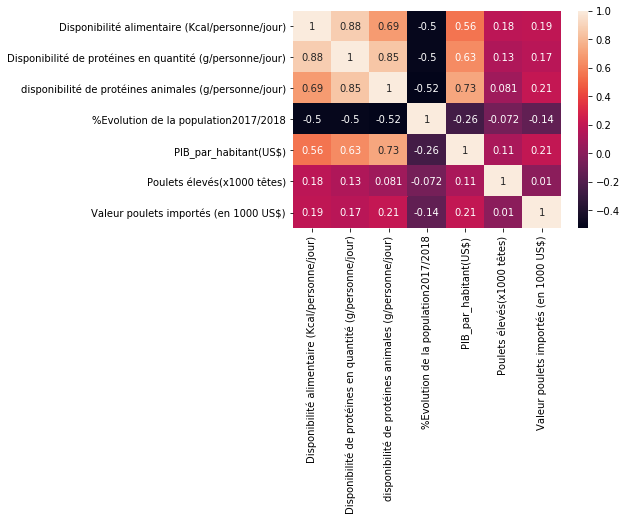

In [79]:
sns.heatmap(df3.corr(), annot=True)
plt.savefig('P9_03_heatmap.png')

--> On constate qu'il existe une correlation négative (-0.5) entre le régime alimentaire (disponibilités alimentaires) et le taux d'évolution de la population.

--> Une correlation positive forte(0.88) entre la disponibilité alimenataire en Kcal et la disponibilité de protéine en quantité et disponibilité de protéines animale 


--> Une correlation positive (0.73) entre le PIB par habitant et la disponibilité de protéines animales


Cette analyse nous permet d'avoir une idées sur les liaisons entre les variables à étudier.

In [72]:
#Enregistrer le DataFrame
df3.to_csv('data_df.csv', index=False)